In [1]:
import pandas as pd

In [35]:
df = pd.read_csv('lab6-csv')
df

,t1,ch1,t2,ch2
0,-37.50,0.797787,-37.50,-0.128589
1,-37.45,0.792830,-37.45,-0.103741
2,-37.40,0.792830,-37.40,-0.188225
3,-37.35,0.782916,-37.35,-0.257800
4,-37.30,0.787873,-37.30,-0.093802
...,...,...,...,...
1495,37.25,2.582351,37.25,-0.029197
1496,37.30,2.587308,37.30,0.080135
1497,37.35,2.577394,37.35,0.060257
1498,37.40,2.562523,37.40,-0.073923


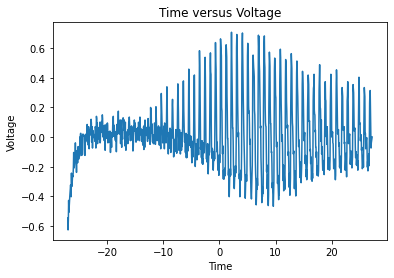

,t1,ch1,t2,ch2
210,-27.00,2.998749,-27.00,-0.546039
211,-26.95,2.998749,-26.95,-0.625553
212,-26.90,2.978921,-26.90,-0.555978
213,-26.85,2.983878,-26.85,-0.426767
214,-26.80,2.964050,-26.80,-0.506282
...,...,...,...,...
1290,27.00,0.738301,27.00,-0.073923
1291,27.05,0.738301,27.05,-0.039136
1292,27.10,0.733344,27.10,-0.024227
1293,27.15,0.738301,27.15,-0.009318


In [48]:
# filter the dataframe to keep only values between -30 and 30
df_filtered = df[(df['t2'] >= -27) & (df['t2'] <= 27.25)]

# create a scatter plot using the filtered dataframe
plt.plot(df_filtered['t2'], df_filtered['ch2'])

# add labels and title to the plot
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Time versus Voltage')

# show the plot
plt.show()
df_filtered

**Caption of graph:** This is a graph of the blood pressure over the time it's recorded. In order to get the pressure I used the transfer function given in the data sheet and multiplied this by the conversion from kPa to mmHg. The final plot shows the converted value (as output) against time. 

Text(0.5, 1.0, 'Graph of Blood Pressure as a Function of Time')

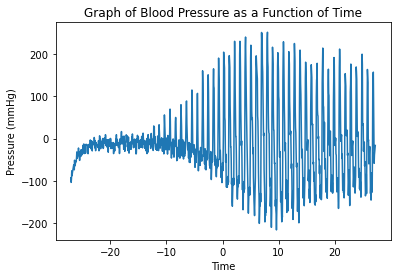

In [59]:
#import numpy as np
pressure = ((1/0.018)*(df_filtered['ch2']/df_filtered['ch1'] - 0.04))
output = pressure * (760/101.325)
plt.plot(df_filtered['t2'], output)
plt.xlabel('Time')
plt.ylabel('Pressure (mmHg)')
plt.title('Graph of Blood Pressure as a Function of Time')

In [64]:
data_frame = pd.read_excel('lab6-xlsx.xlsx')
data_frame

,Frequency of input signal,"Vin (mV, RMS)","Vout (mV, RMS)",Sampling rate (100 * finput)
0,0.1 Hz,0.08734,0.3875,10
1,0.2 Hz,0.08744,0.4679,20
2,0.5 Hz,0.08687,1.2920,50
3,1 Hz,0.08674,1.9270,100
4,2 Hz,0.08571,1.9710,200
5,5 Hz,0.08568,1.9530,500
6,10 Hz,0.08562,1.8800,1000
7,50 Hz,0.08722,1.0680,5000
8,100 Hz,0.08654,0.6231,10000


In [66]:
amplitude = (data_frame['Vout (mV, RMS)']/data_frame['Vin (mV, RMS)'])
amplitude

0     4.436684
1     5.351098
2    14.872798
3    22.215817
4    22.996150
5    22.794118
6    21.957487
7    12.244898
8     7.200139
dtype: float64

**Caption:** Graph of the Frequency versus the Amplitude. I got the amplitude by dividing the two channels together and the frequency was given in the table. My cutoff frequencies were 0.2 (high pass) and 30 (low pass) in addition to a gain of 25. Below is a log-log plot and a non-log plot. 

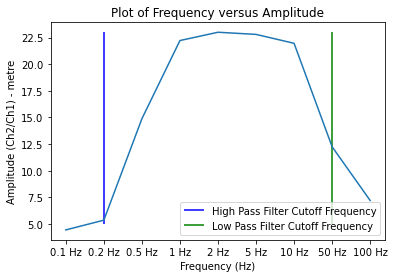

In [102]:
plt.plot(data_frame['Frequency of input signal'], amplitude)
plt.vlines(x = 1, ymin=5.0, ymax=max(amplitude), colors = 'blue', label = 'High Pass Filter Cutoff Frequency')
plt.vlines(x = 7, ymin=5.0, ymax=max(amplitude), colors = 'green', label = 'Low Pass Filter Cutoff Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (Ch2/Ch1) - metre')
plt.title('Plot of Frequency versus Amplitude')
plt.legend()

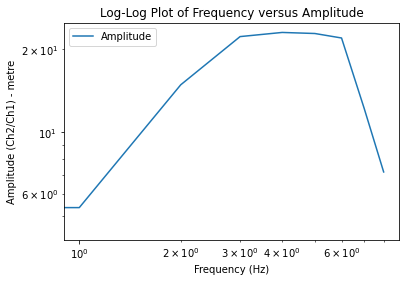

In [104]:
import matplotlib.pyplot as plt

# Assuming you already have data_frame and amplitude data
plt.loglog(data_frame['Frequency of input signal'], amplitude, label='Amplitude')

plt.xscale('log')
plt.yscale('log')


plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (Ch2/Ch1) - metre')
plt.title('Log-Log Plot of Frequency versus Amplitude')
plt.legend()

# Display the plot
plt.show()
